<a href="https://colab.research.google.com/github/p15avgo/colab/blob/master/NeuralNetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all necessary libraries 
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization,Activation, Dropout, Flatten, Dense
from keras import backend as K 
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from keras import backend


In [2]:
data_root = ('/content/drive/MyDrive/release_v0/images')



In [3]:
batch_size = 32
IMAGE_SHAPE = 64,64

image_generator = tf.keras.preprocessing.image.ImageDataGenerator(validation_split = 0.3 , rescale=1/255)
image_data_train = image_generator.flow_from_directory(str(data_root),target_size=IMAGE_SHAPE)


Found 2013 images belonging to 34 classes.


In [4]:
train_image_generator = image_generator.flow_from_directory(str(data_root),subset='training',target_size=IMAGE_SHAPE) # Generator for our training data
validation_image_generator = image_generator.flow_from_directory(str(data_root),subset='validation',target_size=IMAGE_SHAPE)# Generator for our validation data

Found 1420 images belonging to 34 classes.
Found 593 images belonging to 34 classes.


In [5]:
for image_batch, label_batch in image_data_train:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 64, 64, 3)
Label batch shape:  (32, 34)


In [6]:
backend.set_image_data_format('channels_last')

In [7]:
classifier = tf.keras.Sequential()

In [8]:
model = tf.keras.Sequential()

In [9]:

model.add(layers.Conv2D(32, (3, 3),padding="same", activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64, (3, 3),padding="same", activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))



In [10]:
model.add(layers.Flatten())
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=256, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(units=34,activation='softmax'))


In [11]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)       

In [12]:
predictions = model(image_batch)

predictions.shape

TensorShape([32, 34])

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [14]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []
    
  def on_train_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['accuracy'])
    self.model.reset_metrics()

In [15]:

batch_stats_callback = CollectBatchStats() 
history = model.fit(image_data_train,
                    steps_per_epoch=np.ceil(train_image_generator.n/batch_size),
                    validation_data = validation_image_generator,
                    epochs=70,callbacks = [batch_stats_callback],
                    verbose=1)

Epoch 1/70
45/45 [==============================] - 890s 20s/step - loss: 3.4961 - accuracy: 0.0368 - val_loss: 3.4985 - val_accuracy: 0.0405
Epoch 2/70
45/45 [==============================] - 157s 4s/step - loss: 3.4326 - accuracy: 0.0374 - val_loss: 3.4402 - val_accuracy: 0.0388
Epoch 3/70
45/45 [==============================] - 50s 1s/step - loss: 3.3985 - accuracy: 0.0551 - val_loss: 3.3441 - val_accuracy: 0.1046
Epoch 4/70
45/45 [==============================] - 29s 644ms/step - loss: 3.1511 - accuracy: 0.1036 - val_loss: 2.9977 - val_accuracy: 0.1282
Epoch 5/70
45/45 [==============================] - 16s 367ms/step - loss: 2.8776 - accuracy: 0.1291 - val_loss: 2.7391 - val_accuracy: 0.1669
Epoch 6/70
45/45 [==============================] - 15s 334ms/step - loss: 2.6290 - accuracy: 0.1746 - val_loss: 2.5112 - val_accuracy: 0.1889
Epoch 7/70
45/45 [==============================] - 14s 316ms/step - loss: 2.5166 - accuracy: 0.2027 - val_loss: 2.4591 - val_accuracy: 0.2428
Epoch

In [16]:
history.history

{'accuracy': [0.03125,
  0.0,
  0.03125,
  0.125,
  0.15625,
  0.21875,
  0.15625,
  0.1875,
  0.3125,
  0.0625,
  0.28125,
  0.3125,
  0.375,
  0.1875,
  0.28125,
  0.3125,
  0.48275861144065857,
  0.3103448152542114,
  0.34375,
  0.5,
  0.53125,
  0.5,
  0.375,
  0.3125,
  0.46875,
  0.46875,
  0.375,
  0.46875,
  0.625,
  0.625,
  0.46875,
  0.375,
  0.5625,
  0.59375,
  0.53125,
  0.53125,
  0.53125,
  0.5625,
  0.40625,
  0.53125,
  0.75,
  0.75,
  0.59375,
  0.5625,
  0.5625,
  0.625,
  0.53125,
  0.5,
  0.4375,
  0.71875,
  0.71875,
  0.71875,
  0.8125,
  0.5,
  0.53125,
  0.65625,
  0.59375,
  0.6875,
  0.65625,
  0.78125,
  0.84375,
  0.8125,
  0.6875,
  0.75,
  0.65625,
  0.71875,
  0.71875,
  0.8125,
  0.71875,
  0.8125],
 'loss': [3.4520387649536133,
  3.351776599884033,
  3.395766019821167,
  2.9114580154418945,
  2.7428693771362305,
  2.4492716789245605,
  2.4183847904205322,
  2.215517997741699,
  1.8781547546386719,
  2.47318434715271,
  2.1515073776245117,
  2.24705410

In [17]:
train_loss,train_acc = model.evaluate(train_image_generator,steps=45)
test_loss, test_acc = model.evaluate(validation_image_generator,steps=19)
print('Train: %.3f, Test: %.3f'%(train_acc,test_acc))

19/19 [==============================] - 4s 196ms/step - loss: 0.3728 - accuracy: 0.8954
Train: 0.886, Test: 0.895


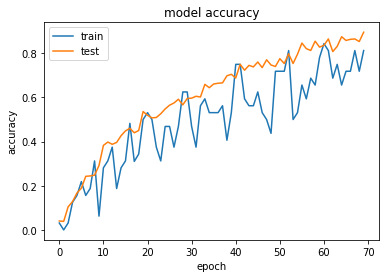

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

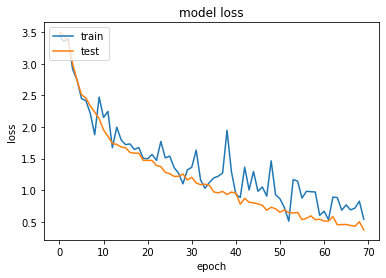

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [20]:
class_names = sorted(image_data_train.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['A1L', 'A2L', 'A3L', 'Adl', 'Ael', 'Fal', 'Fbl', 'Fcl', 'Fdl',
       'Fel', 'Ffl', 'Fgl', 'Fhl', 'Fil', 'Fll', 'Fml', 'Gal', 'Gbl',
       'Gcl', 'Gdl', 'Ggl', 'Gzl', 'Nal', 'Nbl', 'Ncl', 'Ndl', 'Nel',
       'Nfl', 'Ngl', 'Nhl', 'Nil', 'Nll', 'Nml', 'New'], dtype='<U3')

In [21]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

In [22]:
label_id = np.argmax(label_batch, axis=-1)

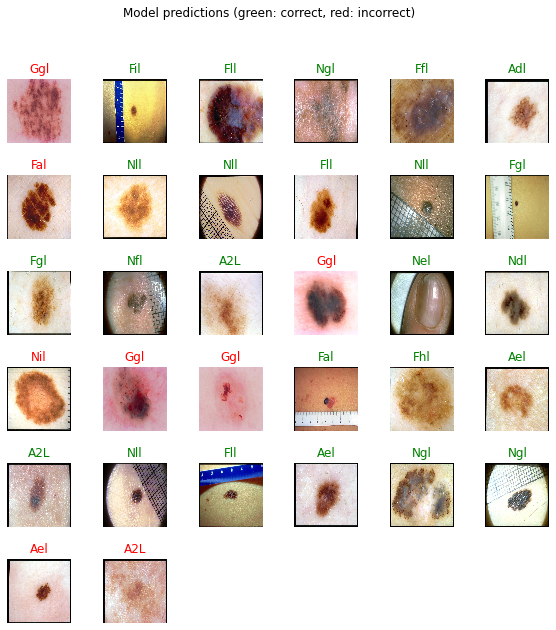

In [23]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.5)
for n in range(32):
  plt.subplot(6,6,n+1)
  plt.imshow(image_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [24]:
cm = confusion_matrix(y_true=label_id,y_pred=(predicted_id))

In [25]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:
cm_plot_labels = []

Confusion matrix, without normalization
[[2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 4]]


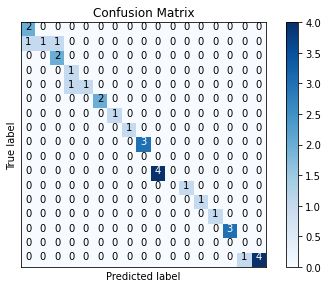

In [27]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')